In [12]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
from functions import *

In [13]:
path = "../Dataset/df_final_oficial_concatenado_com_referencias.csv"
df = preprocess_df(path)

/home/jose23038/work/IC/Perovskita/Rede de Citações e Análises/functions.py:12: DtypeWarning: Columns (3,4,5,7,8,11,19,37,43,48,51,53,59,60,61,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_and_name)
/home/jose23038/work/IC/Perovskita/Rede de Citações e Análises/functions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['DOI'] = df_dropped['DOI'].str.upper()


In [14]:
dicionario = articles_to_dict(df,remove_unknow_articles=False,
                              print_progress = True,)
grafo = nx.Graph(dicionario)


In [4]:
grupos = find_groups(grafo,dicionario, use_modularity = True,save_csv=True,
                     save_name="teste.csv",
                     print_progress=True,n_step_progress=1000)

Processo inicial feito

 Tamanho do grupo:11

 Tamanho do grupo:9

 Tamanho do grupo:1

 Tamanho do grupo:6

 Tamanho do grupo:5

 Tamanho do grupo:5

 Tamanho do grupo:3

 Tamanho do grupo:4

 Tamanho do grupo:4

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:1

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:1

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:2

 Tamanho do grupo:1

 Tamanho do grupo:2

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:2

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho do grupo:1

 Tamanho 

In [6]:
communities = list(greedy_modularity_communities(grafo))


In [ ]:
len(df)

100

: 

: 

: 

In [ ]:
#plot_graph(grafo,dicionario)

: 

: 

: 

In [7]:

def encontrar_grupos_isolados2(dictionary,graph):
    
    componentes = list(greedy_modularity_communities(graph))

    pos = nx.spring_layout(graph, seed=10)
    colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'yellow',
    'brown', 'gray', 'black', 'lime', 'magenta', 'teal', 'navy',
    'gold', 'indigo', 'violet', 'turquoise', 'salmon', 'maroon',
    'olive', 'chocolate', 'orchid', 'plum', 'slateblue', 'crimson', 'darkgreen',
    'darkblue', 'darkred', 'darkorange', 'deeppink', 'deepskyblue', 'dodgerblue',
    'greenyellow', 'lightblue', 'lightcoral', 'lightgreen', 'lightpink',
    'lightsalmon', 'lightseagreen', 'lightskyblue', 'lime']
    plt.figure(figsize=(8, 6))

    for i, grupo in enumerate(componentes):
        nx.draw_networkx_nodes(graph, pos, nodelist=grupo, node_color=colors[i % len(colors)], label=f'Grupo {i+1}', node_size=200)

    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    
    isolated_nodes = set(graph.nodes) - set(dictionary.keys())


    nx.draw_networkx_nodes(graph, pos, nodelist=isolated_nodes, node_color='red', node_size=20, edgecolors='black',
                        label="Artigos fora da amostra")

    nx.draw_networkx_nodes(graph, pos, nodelist=set(graph.nodes) - isolated_nodes, node_color='skyblue', node_size=20, edgecolors='black',
                        label="Artigos presentes na amostra")
    nx.draw_networkx_edges(graph, pos)
    
    plt.legend()
    plt.show()
    

In [8]:
grafo.number_of_edges() 

5099

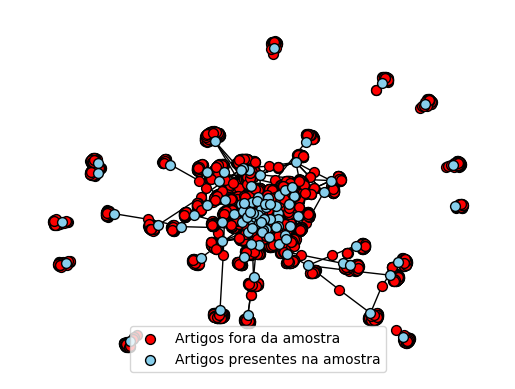

In [10]:
plot_graph(grafo,dicionario,50,1)

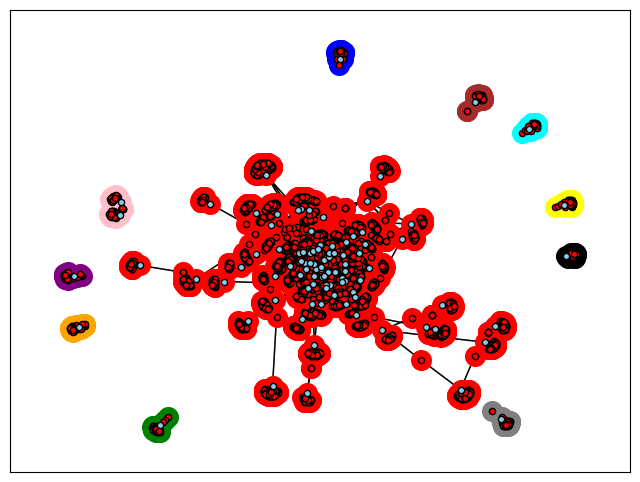

In [11]:
encontrar_grupos_isolados(dicionario,grafo)